[('like', 4941), ('feel', 4223), ('know', 2059), ('time', 2048), ('dissociation', 1656), ('really', 1636), ('thing', 1435), ('get', 1392), ('even', 1288), ('feeling', 1277), ('life', 1151), ('think', 1113), ('felt', 1024), ('year', 1016), ('one', 1008), ('day', 1004), ('anyone', 956), ('thought', 948), ('something', 926), ('would', 922)]
ight worse ever come back scared cry want come back interesting experience day
 communication big answer many thing want unfair significant shut fair working
 behalf ever since love heart really want better best truly make happy make be
t truly make happy make best version want make sure action reflect intention e
eserves best one main problem really want actively working want lose hindsight
problem really want actively working want lose hindsight progress guy tip ensu
ble hard conversation talking trauma want help partner tool recognize oncoming
g away actual problem getting solved want able problem solve rationally withou
k reality already happened o

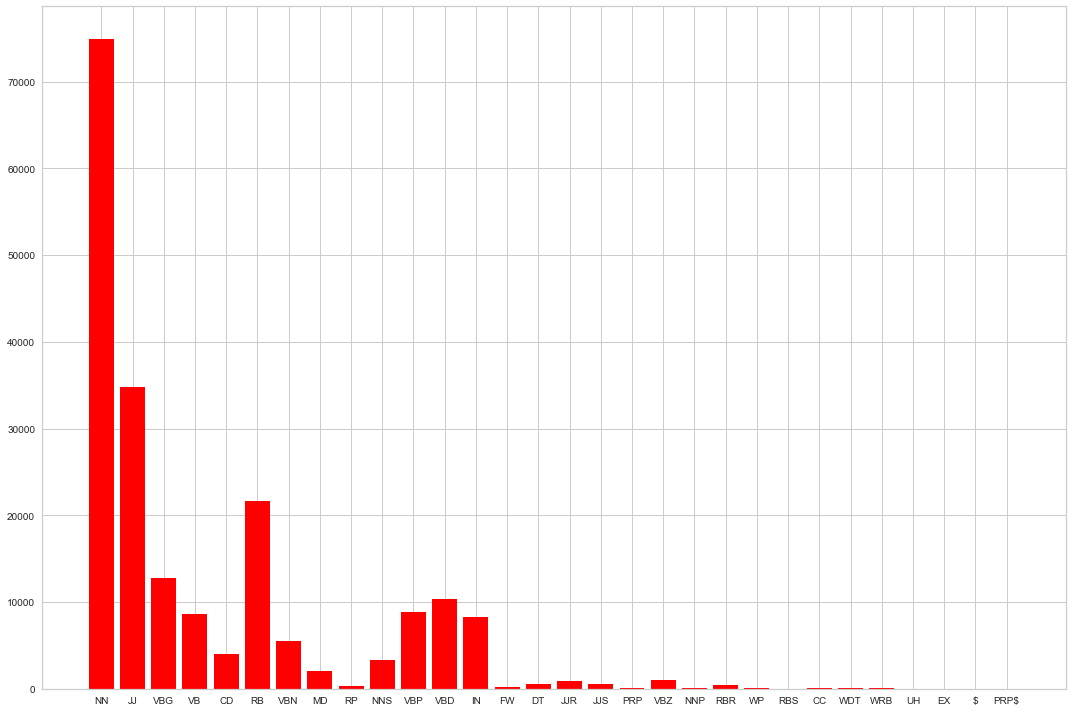

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist


df = pd.read_csv('r-diss data.csv')

df.fillna(value='')

tokenizer = RegexpTokenizer(r'\w+')
#had to add in .astype(str) because it would run into some float types and the .lower() will return an error
df['body'] = df['body'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['body'] = df['body'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
body_list = list(df['body'])


#Text classification: pos tagging
pos_tagged_body = []

for ele in body_list:
    pos_tagged_body.append(nltk.pos_tag(ele))
    

df['pos_tagged_body'] = pos_tagged_body



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['col', 'qualtrics', 'dell', 'lawson', 'com', 'http', 'jfe', 'amazon', 
                'www', 'monmouthpolling', 'nan', 'wikipedia',
                'en', 'org', 'http', 'com']

def exclude(text):
    words = [w for w in text if w not in exclude_list]
    return words
df['body'] = df['body'].apply(lambda x: exclude(x))    
            
for item in df['pos_tagged_body']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags'''
pos_list = []
for row in df['pos_tagged_body']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_body']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


df_new = pd.DataFrame({'text': df['body'],
                       'label': 5})


df_new.to_csv('r-diss data cleaned.csv', index=False)


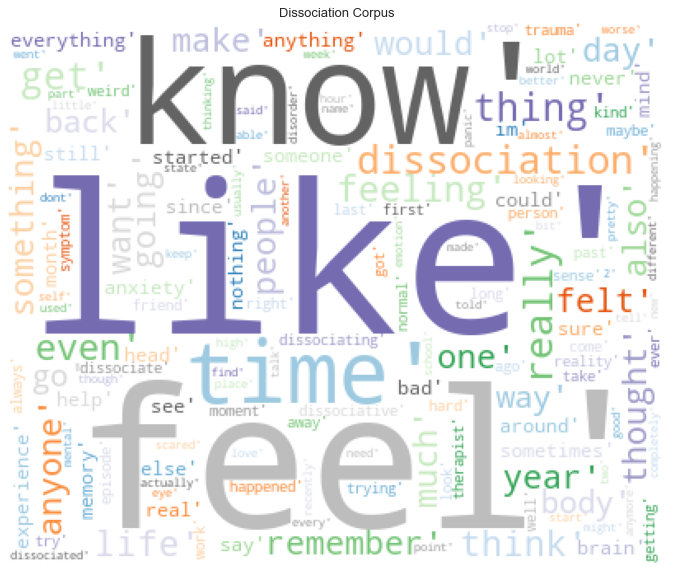

In [21]:
from wordcloud import WordCloud, ImageColorGenerator
'''defining method to generate a WordCloud'''
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=exclude_list,
                      collocations=False,
                      background_color='white'
                     ).generate_from_text(data)
    plt.figure(figsize=(14,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig("wordcloud.png", dpi=300)
    plt.show()
    
generate_wordcloud(str(single_w), 'Dissociation Corpus')

In [22]:
df_new.head()

,text,label
0,"[hello, everyone, name, elisa, villa, senior, ...",5
1,[],5
2,"[wanting, share, experience, dissociation, fre...",5
3,[],5
4,[],5


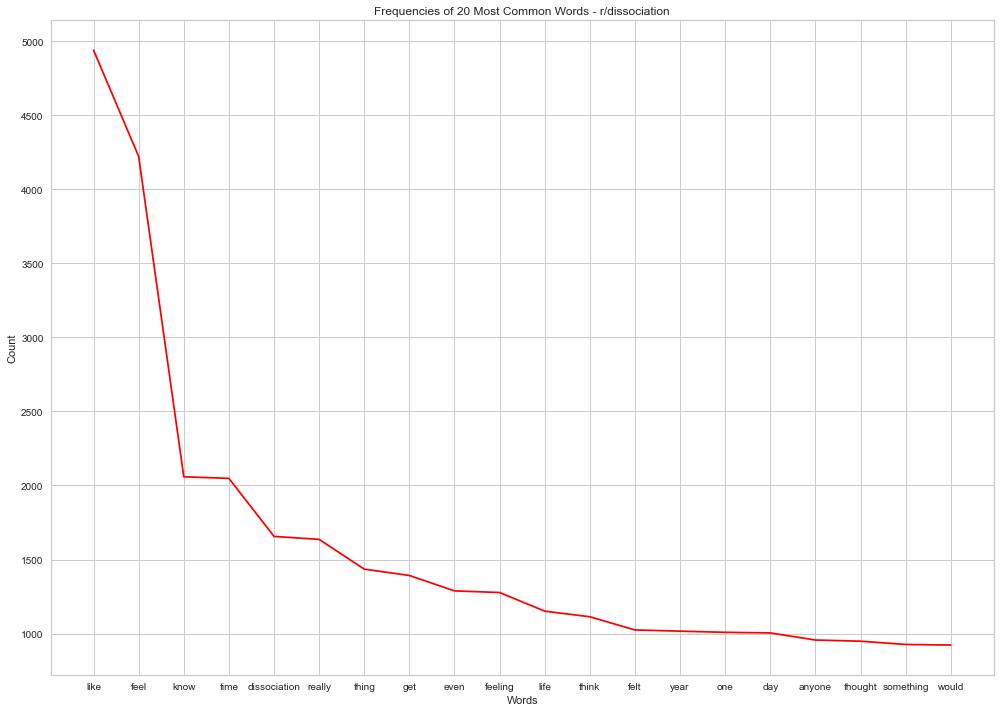

<Figure size 432x288 with 0 Axes>

In [24]:
top_20 = []
w_freq = fd.most_common(20)

freq_dist = dict(w_freq)
fig = plt.figure(figsize=(14,10))
plt.plot(freq_dist.keys(), freq_dist.values(), color='red')
plt.title("Frequencies of 20 Most Common Words - r/dissociation")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.savefig("subreddit.png", dpi=300)